# PyTorch

In the previous modules, we created a simple neural network from scratch. This is great for learning and perhaps not as useful when it comes to real world ML and efficiency! Now we will learn just enough PyTorch to get off the ground making ML models using the power of the framework.


### Why PyTorch?

Other frameworks such as JAX and MXNET have their pros and cons, PyTorch is most suitable for this course since its learning curve is fairly short, its efficiencies are more than enough for our practical implementations, and, as you start to read research papers and explore models out there, PyTorch tends to be the more ubiquitous.

### Synopsis

In this notebook, we will cover:
* Tensors - the core data structure of ML
* Autograd - automatic differentiation
* torch.nn - the neural network module
* Optimizers - for model training
* Loss functions - for calculating the error
* Data loading - for loading datasets and batching
* GPU support - makes use of CUDA if available
* Model saving and loading - for doing things with our models!
* Some useful utilities

### Installing PyTorch

Choose the relevant option at [pytorch.org](https://pytorch.org/get-started/locally/#linux-pip) for your system. If you're on Colab, you can switch to the free GPU (T4) to try the CUDA version. Here, we install the CPU-only package, which should be fine for this notebook.

If you need to check your CUDA version, try
```
nvcc --version
```

In [2]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu --quiet

In [3]:
!pip install torchviz

### Tensors

Until now, we have worked with Numpy arrays. Tensors are similar however have many added abilities, including:

* GPU support
* Automatic differentiation - compute gradients through autograd (more on this soon).
* Supported data types, including a broad range of complex numbers and precision types.

If you're already familiar with Numpy and numpy.array, PyTorch operations will feel very similar.

Tensors are arrays of numerical values such as scalars, vectors and matricies. They can be of any dimension. Dimensions of tensors are commonly called "rank".


In [4]:
import torch

tensor = torch.rand(3,4)
print(f"Tensor = {tensor}")
print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Tensor = tensor([[0.8217, 0.9081, 0.4861, 0.1090],
        [0.2927, 0.9245, 0.8111, 0.5863],
        [0.8967, 0.0790, 0.9228, 0.1586]])
Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [5]:
# Scalar
scalar = torch.tensor(5)
print(f"Scalar rank: {scalar.dim()}")

# Vector
vec = torch.tensor([1, 2, 3])
print(f"Vector rank: {vec.dim()}")

# Matrix
mat = torch.tensor([[1, 2], [3, 4]])
print(f"Matrix rank: {mat.dim()}")

# 3D Tensor
tensor3d = torch.tensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
print(f"3D tensor rank: {tensor3d.dim()}")

Scalar rank: 0
Vector rank: 1
Matrix rank: 2
3D tensor rank: 3


#### Shape and Reshaping

In [6]:
x = torch.rand(2, 3)
print(f"x = {x}")
print(f"size = {x.shape}")

reshaped = x.view(3,2)
print(f"\nreshaped = {reshaped}")
print(f"size = {reshaped.shape}")

y = torch.rand(2, 3, 4)
y_permuted = y.permute(2,0,1)
print(f"\ny = {y}")
print(f"\npermuted = {y_permuted}")

x = tensor([[0.4016, 0.5823, 0.9015],
        [0.6241, 0.2116, 0.9406]])
size = torch.Size([2, 3])

reshaped = tensor([[0.4016, 0.5823],
        [0.9015, 0.6241],
        [0.2116, 0.9406]])
size = torch.Size([3, 2])

y = tensor([[[0.0504, 0.7434, 0.1133, 0.2983],
         [0.3873, 0.1362, 0.9389, 0.4359],
         [0.2582, 0.4259, 0.3242, 0.8771]],

        [[0.8555, 0.4785, 0.2997, 0.9238],
         [0.7330, 0.4245, 0.7903, 0.2459],
         [0.5482, 0.0320, 0.3779, 0.1693]]])

permuted = tensor([[[0.0504, 0.3873, 0.2582],
         [0.8555, 0.7330, 0.5482]],

        [[0.7434, 0.1362, 0.4259],
         [0.4785, 0.4245, 0.0320]],

        [[0.1133, 0.9389, 0.3242],
         [0.2997, 0.7903, 0.3779]],

        [[0.2983, 0.4359, 0.8771],
         [0.9238, 0.2459, 0.1693]]])


#### Tensor Mathematics

In [7]:
a = torch.tensor([1.0, 2.0])
print(f"a: {a}")

b = torch.tensor([3.0, 4.0])
print(f"b: {b}")

add = a + b                     # elementwise addition
print(f"add: {add}")

mul = a * b                     # elementwise multiplication
print(f"multiply: {mul}")

dot = torch.dot(a, b)           # dot product
print(f"dot product: {dot}")

matmul = torch.matmul(a.view(1, 2), b.view(2, 1))  # matrix multiplication
print(f"matrix multiplication: {matmul}")

a: tensor([1., 2.])
b: tensor([3., 4.])
add: tensor([4., 6.])
multiply: tensor([3., 8.])
dot product: 11.0
matrix multiplication: tensor([[11.]])


#### Indexing and Slicing

It be useful to to return an index or part of a tensor

In [8]:
x = torch.tensor([[1, 2, 3],
                  [4, 5, 6]])

print(x[0, 1])      # 2 (row 0, col 1)
print(x[:, 1])      # tensor([2, 5]) — all rows, col 1
print(x[1])         # tensor([4, 5, 6])

tensor(2)
tensor([2, 5])
tensor([4, 5, 6])


#### Device and Data Type

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")
x = torch.tensor([1.0, 2.0], device=device)



# Change data type
y = torch.tensor([1, 2, 3], dtype=torch.float32)
print(f"y: {y}")
print(f"y type: {y.type()}")

Device: cpu
y: tensor([1., 2., 3.])
y type: torch.FloatTensor


#### Gradients and Autograd

Remember our long-winded backpropagation calculations from the previous notebooks? PyTorch uses a system called autograd to compute gradients of tensors automatically during backpropagation. By using `requires_grad=True`, PyTorch builds a computational graph, then calling `.backward()` computes gradients with respect to the inputs.

In [10]:
x = torch.tensor([2.0, 3.0], requires_grad=True)
y = x**2 + 3*x
y.sum().backward()

print(x.grad)  # dy/dx for each element

tensor([7., 9.])


### The Neural Network Module

PyTorch makes it easy to slot together various components to build a neural network.

#### Exercise

Have a read of the [torch.nn](https://docs.pytorch.org/docs/stable/nn.html) module, in particular the following methods:
```
nn.Flatten
nn.Linear
nn.ReLU
```

What would this network look like, using the above methods?

```
class SimpleNN(nn.Module):
    def__init__(self):
        super(SimpleNN, self).__init__()
        # Flatten 28 x 28 images to 784 tensor
        # Fully connected layer 1, with 784 in_features and 128 out_features
        # ReLU activation
        # Fully connected layer 2, with 128 in_features and 10 classes as out_features
```

Read the documentation and try to fill in the four lines below:

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(784, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)
        # Flatten 28 x 28 images to 784 tensor
        # Fully connected layer 1, with 784 in_features and 128 out_features
        # ReLU activation
        # Fully connected layer 2, with 128 in_features and 10 classes as out_features



#### Solution

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()  # Flattens 28x28 to 784
        self.fc1 = nn.Linear(784, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)  # 10 classes for digits 0–9

In [15]:
def test_simplenn_layers():
    model = SimpleNN()

    # Test fc1 input/output dimensions
    assert model.fc1.in_features == 784, "fc1 input should be 784"
    assert model.fc1.out_features == 128, "fc1 output should be 128"

    # Test fc2 input/output dimensions
    assert model.fc2.in_features == 128, "fc2 input should be 128"
    assert model.fc2.out_features == 10, "fc2 output should be 10"

    # Test layer types
    assert isinstance(model.flatten, nn.Flatten), "Missing or incorrect flatten layer"
    assert isinstance(model.relu, nn.ReLU), "Missing or incorrect ReLU layer"


try:
    test_simplenn_layers()
    print("✅ All tests passed.")
except AssertionError as e:
    print(f"❌ Test failed: {e}")

✅ All tests passed.


### Building out the network

Since we now have a model, let's continue to build a working example for MNIST.

#### Feed Forward Step

Our feed forward step is straightforward, since we simply move our calculations through the network. We will add it to our SimpleNN class:

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()  # Flattens 28x28 to 784
        self.fc1 = nn.Linear(784, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)  # 10 classes for digits 0–9

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)  # No softmax here (handled by loss function)
        return x

#### Set the Device

Just as above.

In [17]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#### Datasets

Working with datasets is generally straightforward in PyTorch since we can import many of the better-known ones. [Datasets](https://docs.pytorch.org/vision/main/datasets.html) comes as part of the 'Torchvision' library, part of the same project as PyTorch.

Have a look at the list of datasets, they are great for quick exploration and code samples abound!

[This tutorial](https://docs.pytorch.org/tutorials/beginner/basics/data_tutorial.html) on Datasets & DataLoaders is worth reading.

In [18]:
# Load the MNIST dataset
transform = transforms.ToTensor() # converts images to tensors
train_data = datasets.MNIST(root='.', train=True, download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 12.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 349kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.19MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.87MB/s]


In [20]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: .
    Split: Train
    StandardTransform
Transform: ToTensor()

### Initialize Model, Loss, Optimizer

Here we instantiate our model class and set up the loss and optimizer.

#### A Word on Optimizers
We have covered activations, however didn't have an optimizer in the toy neural network which we built in Python in the third module.

An *optimizer* is simply a function that governs updating the neural network's parameters (the weights and biases) based on the gradients during backpropagation. In our toy example, we simply used gradient descent. Similarly, we could just have used the PyTorch equivalent, `optim.SGD`, however there are also more sophisticated options. Have a look at the documentation [here](https://docs.pytorch.org/docs/stable/optim.html).

In this example, we will use Adam, which maintains a moving average of the gradients and their squared values, providing adaptive learning rates for each parameter. This can lead to faster convergence, learning rate adaption for each parameter, and better handling of sparse gradients.

### Initialize the model, loss function and optimizer

In [21]:
# Initialize model, loss, optimizer
model = SimpleNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

### Visualizing the Model

It can be helpful to visualize the layers and shapes of tensors at each layer. We will use `torchviz` to create a visual graph.

In [22]:
print(model)

SimpleNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [23]:
%pip install -U git+https://github.com/szagoruyko/pytorchviz.git@master --quiet
from torchviz import make_dot, make_dot_from_trace

  Preparing metadata (setup.py) ... done


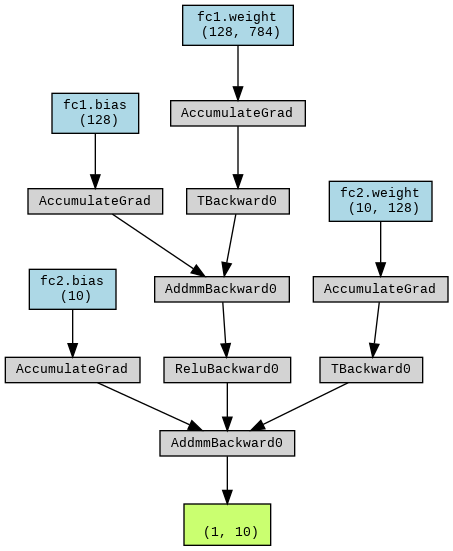

In [24]:
from torchviz import make_dot
from IPython.display import Image

# Dummy input to trace the computation graph
x = torch.randn(1, 1, 28, 28).to(device)
y = model(x)

# Draw graph
make_dot(y, params=dict(model.named_parameters())).render("model_architecture", format="png")

# Display the saved image
Image(filename="model_architecture.png")

### Training Loop

Let's put it all together. We just need to call our images from the DataLoader, run them through the model and perform the updates to model weights as the model checks how wrong it is.

Here we see `num_epochs`, which sets the number of times we compute a full pass of the dataset through the model (hopefully improving its predictions every time).

We also set up some variables to hold how well the model is learning, which make printing progress easy.

In [25]:
import torch
import torch.nn.functional as F

# Assuming model, optimizer, criterion, train_loader already defined
num_epochs = 5

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for batch_idx, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track loss and accuracy
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

        # Print progress every N batches
        if (batch_idx + 1) % 250 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{batch_idx+1}/{len(train_loader)}], "
                  f"Loss: {loss.item():.4f}, Accuracy: {100 * correct / total:.2f}%")

    # Print end-of-epoch summary
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100. * correct / total
    print(f"Epoch {epoch+1} finished - Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%\n")


Epoch [1/5], Step [250/938], Loss: 0.3768, Accuracy: 85.17%
Epoch [1/5], Step [500/938], Loss: 0.2524, Accuracy: 88.42%
Epoch [1/5], Step [750/938], Loss: 0.2375, Accuracy: 89.97%
Epoch 1 finished - Loss: 0.3470, Accuracy: 90.80%

Epoch [2/5], Step [250/938], Loss: 0.2180, Accuracy: 94.85%
Epoch [2/5], Step [500/938], Loss: 0.0754, Accuracy: 95.07%
Epoch [2/5], Step [750/938], Loss: 0.2767, Accuracy: 95.32%
Epoch 2 finished - Loss: 0.1549, Accuracy: 95.45%

Epoch [3/5], Step [250/938], Loss: 0.0402, Accuracy: 96.52%
Epoch [3/5], Step [500/938], Loss: 0.0468, Accuracy: 96.64%
Epoch [3/5], Step [750/938], Loss: 0.0821, Accuracy: 96.71%
Epoch 3 finished - Loss: 0.1080, Accuracy: 96.78%

Epoch [4/5], Step [250/938], Loss: 0.0930, Accuracy: 97.62%
Epoch [4/5], Step [500/938], Loss: 0.1273, Accuracy: 97.56%
Epoch [4/5], Step [750/938], Loss: 0.0733, Accuracy: 97.56%
Epoch 4 finished - Loss: 0.0826, Accuracy: 97.57%

Epoch [5/5], Step [250/938], Loss: 0.0317, Accuracy: 98.26%
Epoch [5/5], Ste

### Evaluation

We can then evaluate the model on a sample group of images.

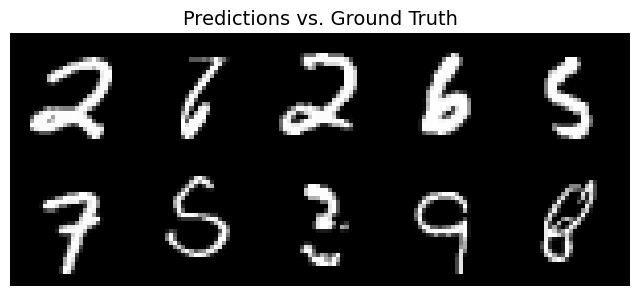

Predicted: [2, 6, 2, 6, 5, 7, 5, 3, 9, 8]
Actual:    [2, 6, 2, 6, 5, 7, 5, 3, 9, 8]


In [26]:
import matplotlib.pyplot as plt
import torchvision

model.eval()
with torch.no_grad():
    # Get a batch of images and labels
    sample_img, sample_label = next(iter(train_loader))
    sample_img, sample_label = sample_img.to(device), sample_label.to(device)

    # Get predictions
    pred = model(sample_img)
    predicted_class = torch.argmax(pred, dim=1)

    # Move everything to CPU for plotting
    images = sample_img.cpu()
    labels = sample_label.cpu()
    predictions = predicted_class.cpu()

    # Create a grid of images (make_grid normalizes automatically)
    grid = torchvision.utils.make_grid(images[:10], nrow=5, padding=2, normalize=True)

    # Plot the grid
    plt.figure(figsize=(8, 8))
    plt.imshow(grid.permute(1, 2, 0))  # CxHxW to HxWxC
    plt.axis('off')
    plt.title("Predictions vs. Ground Truth", fontsize=14)
    plt.show()

    # Print predictions and labels for first 16
    print("Predicted:", predictions[:10].tolist())
    print("Actual:   ", labels[:10].tolist())


### Saving and Loading Models

There are three options for model saving:
* `torch.save` saves a serialized object to disk, using Python's pickle utility.
* `torch.load` uses pickle to deserialize pickled object files to memory.
* `torch.nn.Module.load_state_dict` loads a model's parameter dictionary. A 'state_dict' is a Python dictionary object that maps each layer to its parameter tensor.
* A common PyTorch convention is to save models using either a .pt or .pth file extension.
* For more information on saving and loading, please see the [documentation](https://docs.pytorch.org/tutorials/beginner/saving_loading_models.html).

In [27]:
# Save the model
torch.save(model, "model.pth")

In [28]:
# Load the model
model = torch.load("model.pth", weights_only=False)
# Check the model architecture
model.eval()

SimpleNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [29]:
# Use state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

Model's state_dict:
fc1.weight 	 torch.Size([128, 784])
fc1.bias 	 torch.Size([128])
fc2.weight 	 torch.Size([10, 128])
fc2.bias 	 torch.Size([10])


### Utilities

Finally, we will briefly cover some utility functions.

#### torch.argmax

Returns the index of the maximum value.

In [30]:
x = torch.tensor([1.0, 3.0, 2.0])
idx = torch.argmax(x)
print(idx)

tensor(1)


#### torch.max()

Returns maximum value.

In [31]:
x = torch.tensor([1.0, 3.0, 2.0])
max_val = torch.max(x)
print(max_val)  # Output: 3.0

# Along a dimension
x2 = torch.tensor([[1, 5], [4, 2]])
max_vals, indices = torch.max(x2, dim=1)
print(max_vals)
print(indices)

tensor(3.)
tensor([5, 4])
tensor([1, 0])


#### torch.sum()

Sums all elements along a dimension

In [32]:
x = torch.tensor([[1, 2], [3, 4]])
total = torch.sum(x)
print(total)

sum_dim0 = torch.sum(x, dim=0)
print(sum_dim0)

tensor(10)
tensor([4, 6])


#### torch.no_grad()

Disables gradient tracking, useful during inference.

In [33]:
model = torch.nn.Linear(2, 1)
input = torch.tensor([[1.0, 2.0]])

with torch.no_grad():
    output = model(input)
    print(output)  # No gradients are tracked

tensor([[0.1216]])


#### torch.manual_seed()

Sets a seed so we can reproduce experiments.

In [34]:
torch.manual_seed(42)
x = torch.randn(2)
print(x)  # Same output each run with the same seed
print(x)
print("\n")

torch.manual_seed(22)
y = torch.randn(2)
print(y)
print(y)

tensor([0.3367, 0.1288])
tensor([0.3367, 0.1288])


tensor([ 1.0302, -0.5073])
tensor([ 1.0302, -0.5073])


### Wrap up

In this notebook, we covered the principle features of PyTorch including tensor manipulation and mathematical operations, model creation, training, evaluation, saving and loading, as well as some useful utilities.

This concludes our first module. Now that we have some familiarity with how neural networks learn, have a play around! Try tweaking the model arhitecture to use more layers, or try a different optimizer and compare the training and evaluation runs. Experiment with some of the TorchVision datasets to go beyond MNIST.